from mo

In [2]:
from mov2mp4 import mov2mp4
# Beispielaufruf:

import cv2
from pathlib import Path

def mov2mp4(filename):
    # Aktuelles Verzeichnis
    current_dir = Path.cwd()
    input_path = current_dir / filename

    # Ausgabe-Dateiname (z.B. IMG_0318.mp4)
    output_path = current_dir / (input_path.stem + ".mp4")

    # Video öffnen
    cap = cv2.VideoCapture(str(input_path))
    if not cap.isOpened():
        print(f"❌ Konnte {input_path} nicht öffnen.")
        return

    # Videoeigenschaften
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec für MP4
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    print(f"📹 Konvertiere {input_path.name} → {output_path.name}")
    print(f"FPS: {fps}, Auflösung: {width}x{height}")

    out = cv2.VideoWriter(str(output_path), fourcc, fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        out.write(frame)

    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print("✅ Konvertierung abgeschlossen.")

mov2mp4("IMG_0318.MOV")



📹 Konvertiere IMG_0318.MOV → IMG_0318.mp4
FPS: 29.988697726987315, Auflösung: 1080x1920
✅ Konvertierung abgeschlossen.


In [ ]:

from squat_pose_pipeline import process_video

# optional: Pfade anpassen
video_path = "IMG_0318.mp4"
outdir = "runs/squat_demo"

# Aufruf wie im Script
process_video(
    video_path=video_path,
    outdir=outdir,
    model_name="yolo11n-pose.pt",  # oder 'yolov8n-pose.pt'
    side="auto",                   # 'left', 'right' oder 'auto'
    conf=0.5,
    device="cuda:0"                # oder None für CPU
)


In [ ]:
from IPython.display import Video
Video("runs/squat_demo/annotated.mp4", embed=True)


In [ ]:
from IPython.display import Image
Image("runs/squat_demo/angles_timeseries.png")


In [5]:
from benchpress_pipeline import process_video
import os
video_folder = "bench"
output_folder = "runs/bench_all"

for file in os.listdir(video_folder):
    if file.lower().endswith((".mp4", ".mov", ".avi", ".mkv")):   # erlaubte Endungen
        video_path = os.path.join(video_folder, file)
        outdir = os.path.join(output_folder, os.path.splitext(file)[0])
        print(f"▶️ Verarbeite {video_path}")
        process_video(video_path, outdir=outdir, side="auto")


▶️ Verarbeite bench/IMG_0354.MOV


I0000 00:00:1762231407.195456    9192 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1762231407.268821    9891 gl_context.cc:357] GL version: 3.1 (OpenGL ES 3.1 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: D3D12 (AMD Radeon(TM) Graphics)
Processing (MediaPipe):   0%|          | 0/1261 [00:00<?, ?it/s]INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1762231407.805419    9877 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762231407.928363    9874 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
Processing (MediaPipe):   0%|          | 4/1261 [00:01<04:46,  4.39it/s]/mnt/c/Users/Timon/Desktop/Bachelor/env_mediapipe/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecat


[OK] Annotiertes Video: runs/bench_all/IMG_0354/annotated.mp4
[OK] Features: runs/bench_all/IMG_0354/features.csv
[OK] Plots: runs/bench_all/IMG_0354/elbow_timeseries.png , runs/bench_all/IMG_0354/phases.png
▶️ Verarbeite bench/IMG_0355.MOV


Processing (MediaPipe):   0%|          | 0/5 [00:00<?, ?it/s]W0000 00:00:1762231500.767309   10161 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762231500.930031   10162 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/mnt/c/Users/Timon/Desktop/Bachelor/env_mediapipe/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Processing (MediaPipe): 100%|██████████| 5/5 [00:00<00:00,  6.24it/s]
I0000 00:00:1762231502.527867    9192 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5



[OK] Annotiertes Video: runs/bench_all/IMG_0355/annotated.mp4
[OK] Features: runs/bench_all/IMG_0355/features.csv
[OK] Plots: runs/bench_all/IMG_0355/elbow_timeseries.png , runs/bench_all/IMG_0355/phases.png
▶️ Verarbeite bench/IMG_0356.MOV


I0000 00:00:1762231502.557784   10217 gl_context.cc:357] GL version: 3.1 (OpenGL ES 3.1 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: D3D12 (AMD Radeon(TM) Graphics)
Processing (MediaPipe):   0%|          | 0/1536 [00:00<?, ?it/s]W0000 00:00:1762231502.932164   10202 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762231503.088861   10205 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
Processing (MediaPipe):   8%|▊         | 116/1536 [00:06<01:22, 17.24it/s]/mnt/c/Users/Timon/Desktop/Bachelor/env_mediapipe/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is dep


[OK] Annotiertes Video: runs/bench_all/IMG_0356/annotated.mp4
[OK] Features: runs/bench_all/IMG_0356/features.csv
[OK] Plots: runs/bench_all/IMG_0356/elbow_timeseries.png , runs/bench_all/IMG_0356/phases.png
▶️ Verarbeite bench/IMG_0357.MOV


I0000 00:00:1762231595.694647   10487 gl_context.cc:357] GL version: 3.1 (OpenGL ES 3.1 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: D3D12 (AMD Radeon(TM) Graphics)
Processing (MediaPipe):   0%|          | 0/953 [00:00<?, ?it/s]W0000 00:00:1762231596.136004   10471 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762231596.239433   10478 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/mnt/c/Users/Timon/Desktop/Bachelor/env_mediapipe/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Processing (MediaPipe): 100%|██████████| 953/953 [00:57<0


[OK] Annotiertes Video: runs/bench_all/IMG_0357/annotated.mp4
[OK] Features: runs/bench_all/IMG_0357/features.csv
[OK] Plots: runs/bench_all/IMG_0357/elbow_timeseries.png , runs/bench_all/IMG_0357/phases.png
▶️ Verarbeite bench/IMG_0358.MOV


Processing (MediaPipe):   0%|          | 0/794 [00:00<?, ?it/s]W0000 00:00:1762231655.050273   10667 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762231655.197239   10666 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/mnt/c/Users/Timon/Desktop/Bachelor/env_mediapipe/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Processing (MediaPipe): 100%|██████████| 794/794 [00:48<00:00, 16.38it/s]
I0000 00:00:1762231704.260714    9192 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5



[OK] Annotiertes Video: runs/bench_all/IMG_0358/annotated.mp4
[OK] Features: runs/bench_all/IMG_0358/features.csv
[OK] Plots: runs/bench_all/IMG_0358/elbow_timeseries.png , runs/bench_all/IMG_0358/phases.png
▶️ Verarbeite bench/IMG_0359.MOV


I0000 00:00:1762231704.291127   10841 gl_context.cc:357] GL version: 3.1 (OpenGL ES 3.1 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: D3D12 (AMD Radeon(TM) Graphics)
Processing (MediaPipe):   0%|          | 0/1480 [00:00<?, ?it/s]W0000 00:00:1762231704.655663   10824 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762231704.771759   10826 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/mnt/c/Users/Timon/Desktop/Bachelor/env_mediapipe/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Processing (MediaPipe): 100%|██████████| 1480/1480 [01:2


[OK] Annotiertes Video: runs/bench_all/IMG_0359/annotated.mp4
[OK] Features: runs/bench_all/IMG_0359/features.csv
[OK] Plots: runs/bench_all/IMG_0359/elbow_timeseries.png , runs/bench_all/IMG_0359/phases.png
▶️ Verarbeite bench/IMG_0360.MOV


I0000 00:00:1762231795.090404   11124 gl_context.cc:357] GL version: 3.1 (OpenGL ES 3.1 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: D3D12 (AMD Radeon(TM) Graphics)
Processing (MediaPipe):   0%|          | 0/1735 [00:00<?, ?it/s]W0000 00:00:1762231795.468284   11109 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762231795.597801   11110 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/mnt/c/Users/Timon/Desktop/Bachelor/env_mediapipe/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Processing (MediaPipe): 100%|██████████| 1735/1735 [01:4


[OK] Annotiertes Video: runs/bench_all/IMG_0360/annotated.mp4
[OK] Features: runs/bench_all/IMG_0360/features.csv
[OK] Plots: runs/bench_all/IMG_0360/elbow_timeseries.png , runs/bench_all/IMG_0360/phases.png
▶️ Verarbeite bench/IMG_0361.MOV


Processing (MediaPipe):   0%|          | 0/1230 [00:00<?, ?it/s]W0000 00:00:1762231900.865326   11419 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762231900.974933   11420 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/mnt/c/Users/Timon/Desktop/Bachelor/env_mediapipe/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Processing (MediaPipe): 100%|██████████| 1230/1230 [01:14<00:00, 16.55it/s]
/mnt/c/Users/Timon/Desktop/Bachelor/benchpress_pipeline.py:248: RuntimeWarning: invalid value encountered in cast
  df["direction"] = direction


[OK] Annotiertes Video: runs/bench_all/IMG_0361/annotated.mp4
[OK] Features: runs/bench_all/IMG_0361/features.csv
[OK] Plots: runs/bench_all/IMG_0361/elbow_timeseries.png , runs/bench_all/IMG_0361/phases.png
▶️ Verarbeite bench/IMG_0362.MOV


Processing (MediaPipe):   0%|          | 0/2058 [00:00<?, ?it/s]W0000 00:00:1762231976.307156   11648 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762231976.452823   11646 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
Processing (MediaPipe):   2%|▏         | 39/2058 [00:02<01:44, 19.41it/s]/mnt/c/Users/Timon/Desktop/Bachelor/env_mediapipe/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Processing (MediaPipe): 100%|██████████| 2058/2058 [02:03<00:00, 16.65it/s]
/mnt/c/Users/Timon/Desktop/Bachelor/benchpress_pipeline.py:248: Runtim


[OK] Annotiertes Video: runs/bench_all/IMG_0362/annotated.mp4
[OK] Features: runs/bench_all/IMG_0362/features.csv
[OK] Plots: runs/bench_all/IMG_0362/elbow_timeseries.png , runs/bench_all/IMG_0362/phases.png
▶️ Verarbeite bench/IMG_0363.MOV


I0000 00:00:1762232100.814987   12021 gl_context.cc:357] GL version: 3.1 (OpenGL ES 3.1 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: D3D12 (AMD Radeon(TM) Graphics)
Processing (MediaPipe):   0%|          | 0/1320 [00:00<?, ?it/s]W0000 00:00:1762232101.169875   12006 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762232101.327608   12007 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
Processing (MediaPipe):   1%|          | 14/1320 [00:01<01:18, 16.70it/s]/mnt/c/Users/Timon/Desktop/Bachelor/env_mediapipe/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is depr


[OK] Annotiertes Video: runs/bench_all/IMG_0363/annotated.mp4
[OK] Features: runs/bench_all/IMG_0363/features.csv
[OK] Plots: runs/bench_all/IMG_0363/elbow_timeseries.png , runs/bench_all/IMG_0363/phases.png
▶️ Verarbeite bench/IMG_0364.MOV


I0000 00:00:1762232182.106180    9192 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1762232182.144835   12269 gl_context.cc:357] GL version: 3.1 (OpenGL ES 3.1 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: D3D12 (AMD Radeon(TM) Graphics)
Processing (MediaPipe):   0%|          | 0/1568 [00:00<?, ?it/s]W0000 00:00:1762232182.494028   12254 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762232182.655453   12256 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/mnt/c/Users/Timon/Desktop/Bachelor/env_mediapipe/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('S


[OK] Annotiertes Video: runs/bench_all/IMG_0364/annotated.mp4
[OK] Features: runs/bench_all/IMG_0364/features.csv
[OK] Plots: runs/bench_all/IMG_0364/elbow_timeseries.png , runs/bench_all/IMG_0364/phases.png
▶️ Verarbeite bench/IMG_0365.MOV


I0000 00:00:1762232277.990071   12563 gl_context.cc:357] GL version: 3.1 (OpenGL ES 3.1 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: D3D12 (AMD Radeon(TM) Graphics)
Processing (MediaPipe):   0%|          | 0/1462 [00:00<?, ?it/s]W0000 00:00:1762232278.434001   12547 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762232278.710286   12549 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/mnt/c/Users/Timon/Desktop/Bachelor/env_mediapipe/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Processing (MediaPipe): 100%|██████████| 1462/1462 [01:2


[OK] Annotiertes Video: runs/bench_all/IMG_0365/annotated.mp4
[OK] Features: runs/bench_all/IMG_0365/features.csv
[OK] Plots: runs/bench_all/IMG_0365/elbow_timeseries.png , runs/bench_all/IMG_0365/phases.png
▶️ Verarbeite bench/IMG_0366.MOV


Processing (MediaPipe):   0%|          | 0/303 [00:00<?, ?it/s]W0000 00:00:1762232367.171294   12820 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762232367.321465   12818 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/mnt/c/Users/Timon/Desktop/Bachelor/env_mediapipe/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Processing (MediaPipe): 100%|██████████| 303/303 [00:18<00:00, 16.62it/s]
I0000 00:00:1762232386.089363    9192 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5



[OK] Annotiertes Video: runs/bench_all/IMG_0366/annotated.mp4
[OK] Features: runs/bench_all/IMG_0366/features.csv
[OK] Plots: runs/bench_all/IMG_0366/elbow_timeseries.png , runs/bench_all/IMG_0366/phases.png
▶️ Verarbeite bench/IMG_0367.MOV


I0000 00:00:1762232386.118647   12919 gl_context.cc:357] GL version: 3.1 (OpenGL ES 3.1 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: D3D12 (AMD Radeon(TM) Graphics)
Processing (MediaPipe):   0%|          | 0/1157 [00:00<?, ?it/s]W0000 00:00:1762232386.475374   12906 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762232386.600075   12902 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
Processing (MediaPipe):   0%|          | 1/1157 [00:00<10:23,  1.85it/s]/mnt/c/Users/Timon/Desktop/Bachelor/env_mediapipe/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is depre


[OK] Annotiertes Video: runs/bench_all/IMG_0367/annotated.mp4
[OK] Features: runs/bench_all/IMG_0367/features.csv
[OK] Plots: runs/bench_all/IMG_0367/elbow_timeseries.png , runs/bench_all/IMG_0367/phases.png


In [40]:
import pandas as pd

df= pd.read_csv("runs/bench_all/IMG_0361/features.csv")
df.head()

,frame,time_s,elbow_deg,upperarm_torso_deg,forearm_horiz_deg,elbow_deg_smooth,elbow_vel_deg_s,direction,phase,rep_id,rep_status
0,0,0.000000,121.294595,82.210551,145.434369,121.694241,-2.385601,0,TOP,0,ok
1,1,0.033335,121.854576,84.092386,145.628326,121.614718,7.676327,1,TOP,0,ok
2,2,0.066669,122.140862,84.648024,145.637555,122.206017,27.800184,1,TOP,0,ok
3,3,0.100004,123.950322,85.212754,144.060314,123.468138,47.924042,1,TOP,0,ok
4,4,0.133339,126.145559,86.071659,142.652480,125.401083,69.021409,1,TOP,0,ok


/mnt/c/Users/Timon/Desktop/Bachelor/env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/mnt/c/Users/Timon/Desktop/Bachelor/env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/mnt/c/Users/Timon/Desktop/Bachelor/env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/mnt/c/Users/Timon/Desktop/Bachelor/env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/mnt/c/Users/Timon/Desktop/Bachelor/env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/mnt/c/Users/Timon/Desktop/Bac

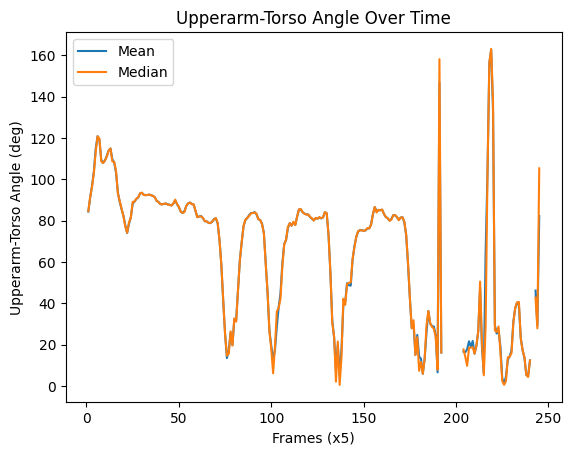

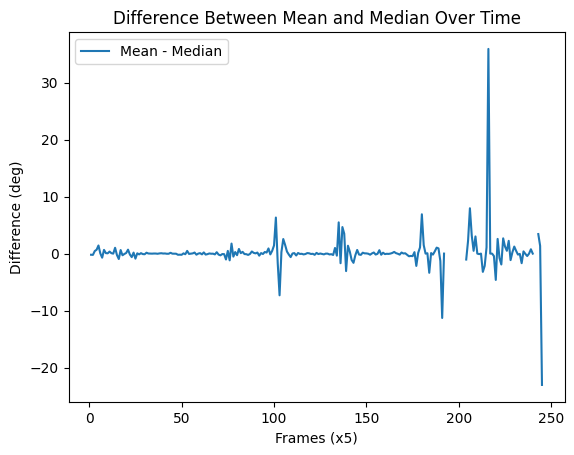

In [41]:
import matplotlib.pyplot as plt
import numpy as np
mean_values = []
median_values = []
for i in range(int(df.shape[0]/5)):
 mean_values.append(df["upperarm_torso_deg"][5*(i-1):5*i].mean())
 median_values.append(df["upperarm_torso_deg"][5*(i-1):5*i].median())
 

plt.plot(mean_values, label="Mean")
plt.plot(median_values, label="Median")
plt.xlabel("Frames (x5)")
plt.ylabel("Upperarm-Torso Angle (deg)")
plt.title("Upperarm-Torso Angle Over Time")
plt.legend()
plt.show()
plt.plot(np.array(mean_values) - np.array(median_values),label="Mean - Median")
plt.xlabel("Frames (x5)")
plt.ylabel("Difference (deg)")      
plt.title("Difference Between Mean and Median Over Time")
plt.legend()
plt.show()

In [45]:
df["rep_status"].value_counts()

rep_status
fail:no_bottom    956
ok                274
Name: count, dtype: int64

In [1]:
# Falls nötig: !pip install opencv-python mediapipe pandas matplotlib tqdm scipy
from benchpress_pipeline2 import process_video
from pathlib import Path
# Wenn du die Funktion im selben Notebook definiert hast, kannst du sie direkt verwenden.
# Wenn sie in einer Datei liegt (z.B. bench_pipeline.py), dann:
# from bench_pipeline import process_video

VIDEO = "bench/IMG_0360.MOV"   # Pfad zu deinem Video
OUT   = "runs/bench_demo"

process_video(
    video_path=VIDEO,
    outdir=OUT,
    side="auto",          # 'left'|'right'|'auto'
    vis=True,             # Echtzeit-Overlay ins Output-Video zeichnen

    # (Savitzky-Golay)
    smooth_win=9,
    poly=2,

    # WICHTIG: entschärfte FSM-Entscheidung auf Mittel der letzten Frames:
    mean_k=5,             # Gleitfenster (Frames) für die Zustandsentscheidung
    stride=1,             # jeden Frame verarbeiten

    # Akzeptanzkriterien (toleranter als vorher, ggf. nachjustieren)
    vel_eps=3.0,          # °/s: "Stillstand"
    hysteresis=7.0,       # °: Top/Bottom-Hysterese
    min_state_frames=2,   # Mindestdauer je Zustand (Frames)
    dwell_bottom_max=1.5, # s: max. Verweildauer unten
    backslide_v=5.0,      # °/s: Backslide-Schwelle während UP

    # Adaptives Top/Bottom aus den Daten:
    top_percentile=85.0,
    bottom_percentile=15.0,
    clamp_top_min=150.0,
    clamp_bottom_max=110.0,
)


I0000 00:00:1762455530.766914   14856 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1762455530.817114   15080 gl_context.cc:357] GL version: 3.1 (OpenGL ES 3.1 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: D3D12 (AMD Radeon(TM) Graphics)
Processing (MediaPipe):   0%|          | 0/1735 [00:00<?, ?it/s]INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1762455531.329980   15076 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762455531.590945   15066 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/mnt/c/Users/Timon/Desktop/Bachelor/env_mediapipe/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase


[OK] Annotiertes Video: runs/bench_demo/annotated.mp4
[OK] Features: runs/bench_demo/features.csv
[OK] Plots: runs/bench_demo/elbow_timeseries.png, runs/bench_demo/phases.png
[INFO] Reps gezählt: 0 | Events fail: 116
